<a href="https://colab.research.google.com/github/Ragulan-K/Vibrations/blob/main/ME320_50_Questions_(4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from numpy import linalg

import scipy as sp
import math
import sympy
from scipy.integrate import odeint
from matplotlib import animation, rc
from IPython.display import HTML
import matplotlib as mpl
import matplotlib.collections as mcol
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLineCollection, HandlerTuple
from matplotlib.lines import Line2D
from mpl_toolkits import mplot3d

#mpl.rcParams['text.usetex'] = True

import plotly.graph_objects as go
import plotly.express as px

from sympy import symbols
from sympy import Matrix
from sympy import simplify
from sympy import factor
from sympy import latex
from sympy import *
sympy.init_printing()

**1)** \\
\begin{align}
Frequency= N \times \frac{2\pi}{60}
\end{align}

In [ ]:
N=389
N*2*np.pi/60

In [ ]:
m=100
K=100000
w=sqrt(K/m)
f=(w)/(2*np.pi)
f

In [ ]:
k=3
m=1
c=0.61
w=sqrt(k/m)*sqrt(1-c**2)
w

**3)** \\
By the newton's equations,
\begin{align*}
M\ddot{x}= -Kx - C\dot{x} + f(t) \\
M\ddot{x} + Kx + C\dot{x} = f(t) \\
\ddot{x} + \frac{C}{M}\dot{x} +\frac{K}{M}x = \frac{1}{M}f(t) \\
\ddot{x} + 2\omega_n \zeta_\dot{x} +\omega_n^2x = \frac{1}{M}f(t)
\end{align*} \\
Where,
\begin{align*}
2\omega_n \zeta_=\frac{C}{M} &\: &, \omega_n^2 =\frac{K}{M}
\end{align*} 

**4)** \\
By considering $x_1 = x$ and $x_2=\dot{x}$
\begin{align*}
\ddot{x} &= -\frac{C}{M}\dot{x} -\frac{K}{M}x+\frac{1}{M}F \\
\dot{x}_2 &= -\frac{C}{M}{x}_2 -\frac{K}{M}x_1+\frac{1}{M}F \\
 \\
\dot{x} &= 1\times x_2 + 0\times x_1 \\
\dot{x}_1&= 1\times x_2 + 0\times x_1
\end{align*} \\
Then we write the above two set of equations in matrix form as,
\begin{align*}
\begin{bmatrix} \dot{x}_1 \\ \dot{x}_2 \end{bmatrix} &= \begin{bmatrix} 0 & 1 \\ -\frac{K}{M} & -\frac{C}{M} \end{bmatrix}\begin{bmatrix} {x}_1 \\x_2 \end{bmatrix} + \begin{bmatrix} 0 & 0 \\ 0 & \frac{1}{M} \end{bmatrix}\begin{bmatrix} 0 \\ F \end{bmatrix} \\
\dot{X} &=  AX + Bu
\end{align*} where,
\begin{align*}
X=\begin{bmatrix} {x}_1 \\x_2 \end{bmatrix} &, &A=\begin{bmatrix} 0 & 1 \\ -\frac{K}{M} & -\frac{C}{M} \end{bmatrix} &, &B=\begin{bmatrix} 0 & 0 \\ 0 & \frac{1}{M} \end{bmatrix} &, &u=\begin{bmatrix} 0 \\ F \end{bmatrix}
\end{align*} \\
We can solve the above equation as follow, by multiplying both the sides by $e^{-At}$,
\begin{align*}
e^{-At}\dot{X} &=  e^{-At}AX + e^{-At}Bu(t) \\
e^{-At}\dot{X} - e^{-At}AX &= e^{-At}Bu(t) \\
\frac{d(e^{-At}X(t))}{dt} &= e^{-At}Bu(t) \\
\int_0^t\frac{d(e^{-A\tau}X(\tau))}{d\tau}d\tau &= \int_0^te^{-A\tau}Bu(\tau)d\tau \\
e^{-At}X(t) - X(0) &= \int_0^te^{-A\tau}Bu(\tau)d\tau \\
X(t) &= \frac{1}{e^{-At}}X(0)+\frac{1}{e^{-At}}\int_0^te^{-A\tau}Bu(\tau)d\tau \\
X(t) &= e^{At}X(0)+\int_0^te^{At}e^{-A\tau}Bu(\tau)d\tau \\
X(t) &= e^{At}X(0)+\int_0^te^{A(t-\tau)}Bu(\tau)d\tau
\end{align*}

**5)** \\

In [ ]:
class mugas_dynamic_systems_simulation_functions:
  
  def __init__(self): 
    self=[];

  def simulateDySystem(self, dynamicSystemModel, Tmax, dT, X0, sysPara, figTitle, xLabel, yLabel):
    t = np.linspace(0, Tmax, int(Tmax/dT+1))
    sol = odeint(dynamicSystemModel, X0, t, args=(sysPara,));
    self.soln=sol;
    fig = go.Figure()
    [nt,nS]=sol.shape;

    # Add traces
    for nn in range(nS):
      fig.add_trace(go.Scatter(x=t, y=sol[:,nn], mode='lines+markers', name='x'+str(nn+1)))
      fig.update_layout(title=figTitle, xaxis=dict(title=xLabel),yaxis=dict(title=yLabel))
    
    fig.show()
    return [t,sol,fig] 

  def animate_particle_motion(self, XX, axisRange, figTitle):
    xx=[jj[0] for jj in XX]
    yy=[jj[1] for jj in XX]
    zz=[jj[2] for jj in XX]

    fig = go.Figure(
        data=[go.Scatter3d(x=[xx[0]], y=[yy[0]],z=[zz[0]],
                        mode="markers",
                        marker=dict(color="red", size=10)),
              go.Scatter3d(x=xx, y=yy,z=zz, name='Path',
                        mode="lines",
                        line=dict(color="blue", width=2))],
        layout=go.Layout(
            scene = dict(
                        xaxis=dict(range=axisRange[0], autorange=False),
                        yaxis=dict(range=axisRange[1], autorange=False),
                        zaxis=dict(range=axisRange[2], autorange=False),
                        aspectratio=dict(x=1, y=1, z=1),
            ),
            title_text=figTitle, hovermode="closest",
            updatemenus=[dict(type="buttons",
                              buttons=[dict(label="Play",
                                            method="animate",
                                            args=[None])])]),
        frames=[go.Frame(
            data=[go.Scatter3d(
                x=[p[0]],
                y=[p[1]],
                z=[p[2]],
                name='Particle',
                mode="markers",
                marker=dict(color="red", size=10))])

            for p in XX]
    )

    fig.show()
    return fig

In [ ]:
md=mugas_dynamic_systems_simulation_functions()



---


forcing $f(t)=0$ and $\zeta>1$

In [ ]:
def LinearSystemModel(X, t, parameters):
  A=parameters[0]; B=parameters[1];
  u=0 #np.sin(0.1*t); #Input
  dXdt=A @ X + B*u;
  return dXdt
m=1; k=1; c=4;
A=np.array([[0,1],[-k/m,-c/m]]);
B=np.array([0,1/m]);
[t,sol,fig]=md.simulateDySystem(LinearSystemModel, 30,0.01, [1,0], [A, B], 'Spring Mass System', 'Time / t', 'x')



---

forcinf $f(t)=0$ and $\zeta=1$

In [ ]:
def LinearSystemModel(X, t, parameters):
  A=parameters[0]; B=parameters[1];
  u=0 #np.sin(0.1*t); #Input
  dXdt=A @ X + B*u;
  return dXdt
m=1; k=1; c=0;
A=np.array([[0,1],[-k/m,-c/m]]);
B=np.array([0,1./m]);
[t,sol,fig]=md.simulateDySystem(LinearSystemModel, 30,0.01, [1,0], [A, B], 'Spring Mass System', 'Time / t', 'x')



---

forcinf $f(t)=0$ and $0<\zeta<1$

In [ ]:
def LinearSystemModel(X, t, parameters):
  A=parameters[0]; B=parameters[1];
  u=0 #np.sin(0.1*t); #Input
  dXdt=A @ X + B*u;
  return dXdt
m=1; k=1; c=1;
A=np.array([[0,1],[-k/m,-c/m]]);
B=np.array([0,1./m]);
[t,sol,fig]=md.simulateDySystem(LinearSystemModel, 15,0.01, [1,0], [A, B], 'Spring Mass System', 'Time / t', 'x')

**8)**

By using the newton's equations we can write the expression for system as,
\begin{align*}
M\ddot{x}+C\dot{x}+ Kx = f(t) 
\end{align*} \\
Then we re write the above equation by considering $2\zeta\omega_n = \frac{C}{M}$ and $\omega_n^2=\frac{K}{M}$,
\begin{align*}
\ddot{x}+2\zeta\omega_n\dot{x}+ \omega_n^2x = \frac{1}{M}f(t) 
\end{align*} \\
Then we can solve the above equation using linear laplace tranforms and obtaining inverse laplace tranform afterwards to obtain an relationship for $x(t)$. 
\begin{align*}
\mathcal{L}\left \{ \ddot{x}+2\zeta\omega_n\dot{x}+ \omega_n^2x \right \} = \frac{1}{M}\mathcal{L}\{f(t)\} \\
(s^2+2 \zeta \omega_n s + \omega_n^2) X(s) - \dot{x}(0)- ( s + 2\zeta \omega_n)x(0)  &= \frac{1}{M} F(s) \\
X(s) &=\frac{1}{s^2+2 \zeta \omega_n s + \omega_n^2} \dot{x}(0)+\frac{ s + 2\zeta \omega_n}{s^2+2 \zeta \omega_n s + \omega_n^2}x(0)
+\frac{1/M}{s^2+2 \zeta \omega_n s + \omega_n^2}F(s)
\end{align*} \\
By obtaining the inverse,
\begin{align*}
x(t)&=\dot{x}(0)\mathcal{L}^{-1}\left\{\frac{1}{s^2+2 \zeta \omega_n s + \omega_n^2} \right\}+x(0)\mathcal{L}^{-1}\left\{\frac{ s + 2\zeta \omega_n}{s^2+2 \zeta \omega_n s + \omega_n^2}\right\}+\mathcal{L}^{-1}\left\{\frac{1/M}{s^2+2 \zeta \omega_n s + \omega_n^2}F(s)\right\}
\end{align*} \\
Then we can write the above set of solutions as two parts $x(t)=x_{IC}(t) + x_f(t)$. Where,
\begin{align*}
x_{IC}(t)&=\dot{x}(0)\mathcal{L}^{-1}\left\{\frac{1}{s^2+2 \zeta \omega_n s + \omega_n^2} \right\}+x(0)\mathcal{L}^{-1}\left\{\frac{ s + 2\zeta \omega_n}{s^2+2 \zeta \omega_n s + \omega_n^2}\right\} \\
x_f(t) &=\mathcal{L}^{-1}\left\{\frac{1/M}{s^2+2 \zeta \omega_n s + \omega_n^2}F(s)\right\}
\end{align*} \\
To obtain the inverse laplace tranform of the given functions  we have to expand the polynomial in the terms in order to obtain partial fractions. This will depnd on the roots of the polynomials of,
\begin{align*}
\Delta (s) = s^2+2 \zeta \omega_n s + \omega_n^2
\end{align*}

In [ ]:
s,wn,zeta=symbols("s,w_n,zeta")

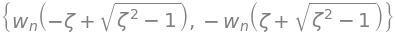

In [ ]:
F=s**2 + 2*wn*zeta*s + wn**2
lamb= factor(solveset(F,s))
lamb

In [ ]:
latex([*lamb][0])

'- w_{n} \\left(\\zeta + \\sqrt{\\zeta^{2} - 1}\\right)'

In [ ]:
latex([*lamb][1])

'w_{n} \\left(- \\zeta + \\sqrt{\\zeta^{2} - 1}\\right)'

In [ ]:
factor(([*lamb][0] + [*lamb][1]))

Therefor, teh roots of the denominator can be taken as,
\begin{align}
\lambda_1 &= - w_{n} \left(\zeta + \sqrt{\zeta^{2} - 1}\right) \\
\lambda_2 &= w_{n} \left(- \zeta + \sqrt{\zeta^{2} - 1}\right)
\end{align} \\
Therefor, we can write the above set of equations as,
\begin{align}
x(t) &=\dot{x}(0)\mathcal{L}^{-1}\left[ \frac{1}{(s-\lambda_1)(s-\lambda_2)}\right ]+ {x}(0)\mathcal{L}^{-1}\left[ \frac{s-\lambda_1 -\lambda_2 }{(s-\lambda_1)(s-\lambda_2)}\right ] \\
x(t) &=\dot{x}(0)\mathcal{L}^{-1}\left[ \frac{c'_1}{(s-\lambda_1)} +\frac{c'_2}{(s-\lambda_2) }\right ]+ {x}(0)\mathcal{L}^{-1}\left[ \frac{c''_1}{(s-\lambda_1)} +\frac{c''_2}{(s-\lambda_2) }\right ] \\
x(t) &= (\dot{x}(0)c_1' + x(0)c_1'')\mathcal{L}^{-1}\left[ \frac{1}{(s-\lambda_1)} \right ] + (\dot{x}(0)c_2' + x(0)c_2'')\mathcal{L}^{-1}\left[ \frac{1}{(s-\lambda_2)} \right ] \\
x(t) &= c_{11}\mathcal{L}^{-1}\left[ \frac{1}{(s-\lambda_1)} \right ] + c_{12}\mathcal{L}^{-1}\left[ \frac{1}{(s-\lambda_2)} \right ] \\
x(t) &= c_{11}e^{-\lambda_1t} + c_{12}e^{-\lambda_2t}
\end{align} \\
By differentiating the above expression for $x(t)$ we can obtain $\dot{x}(t)$ as,
\begin{align}
\dot{x}(t) &= -\lambda_1c_{11}e^{-\lambda_1t} -\lambda_2c_{12}e^{-\lambda_2t}
\end{align} \\
Therefor we can write the final solutions as,
\begin{align}
\begin{bmatrix} x(t) \\ \dot{x}(t) \end{bmatrix} &= \begin{bmatrix} c_{11}e^{-\lambda_1t} + c_{12}e^{-\lambda_2t} \\ -\lambda_1c_{11}e^{-\lambda_1t} -\lambda_2c_{12}e^{-\lambda_2t} \end{bmatrix}
\end{align}

**9)** \\
When the damping ratio is neglegible, by following expression we'll have
\begin{align}
\lambda_1 &= - w_{n} \left(\zeta + \sqrt{\zeta^{2} - 1}\right) \\
\lambda_1 &= - iw_{n} \\
 \\
\lambda_2 &= w_{n} \left(- \zeta + \sqrt{\zeta^{2} - 1}\right) \\
\lambda_2 &= iw_{n}
\end{align}
Then we can write the main equation in the form by considering the initial condition response as,
\begin{align*}
x(t)&=\dot{x}(0)\mathcal{L}^{-1}\left\{\frac{1}{s^2 + \omega_n^2} \right\}+x(0)\mathcal{L}^{-1}\left\{\frac{ s }{s^2+ \omega_n^2}\right\} \\
x(t)&=\dot{x}(0)sin(\omega_nt)+x(0)cos(\omega_nt) \\
x(t)&=c_{11}sin(\omega_nt)+c_{12}cos(\omega_nt)
\end{align*} \\
We can obtain a relationship for $\dot{x}(t)$ by differentiating the baove function as,
\begin{align*}
\dot{x}(t)&=\omega_n\times c_{11}cos(\omega_nt)- \omega_n\times c_{12}sin(\omega_nt) \\
\dot{x}(t)&=c_{21}cos(\omega_nt)-  c_{22}sin(\omega_nt) 
\end{align*} \\
Therefor we can write the set of solutions as,
\begin{align*}
\begin{bmatrix} x(t) \\ \dot{x}(t) \end{bmatrix}&=\begin{bmatrix} c_{11}sin(\omega_nt)+c_{12}cos(\omega_nt) \\ c_{21}cos(\omega_nt)-  c_{22}sin(\omega_nt)  \end{bmatrix}
\end{align*}

**10)** \\
When the $0 < \zeta < 1$ is neglegible, by following expression we'll have
\begin{align}
\lambda_1 &= - w_{n} \left(\zeta + \sqrt{\zeta^{2} - 1}\right) \\
\lambda_1 &= - \zeta \omega_n- iw_{n}\sqrt{\zeta^{2} - 1} \\
\lambda_1 &= - \zeta \omega_n- iw_{d} \\
 \\
\lambda_2 &= w_{n} \left(- \zeta + \sqrt{\zeta^{2} - 1}\right) \\
\lambda_1 &= - \zeta \omega_n+ iw_{n}\sqrt{\zeta^{2} - 1} \\
\lambda_1 &= - \zeta \omega_n+ iw_{d} \\
\end{align} \\
By the step,
\begin{align}
x(t) &= c_{11}e^{-\lambda_1t} + c_{12}e^{-\lambda_2t} \\
x(t) &= c_{11}e^{ (-\zeta \omega_n- iw_{d})t} + c_{12}e^{ (-\zeta \omega_n+ iw_{d})t} \\
x(t) &= c_{11}e^{ -\zeta \omega_nt}e^{ - iw_{d}t} + c_{12}e^{ -\zeta \omega_nt}e^{ + iw_{d}t} \\
x(t) &= e^{ -\zeta \omega_nt} \left( c_{11} sin(w_{d}t) + c_{12}sin(-w_{d}t) \right) \\
x(t) &= e^{ -\zeta \omega_nt} \left( c_{11} sin(w_{d}t) + c_{12}cos(w_{d}t) \right)
\end{align} \\
By differentiating this with respect to time,
\begin{align}
\dot{x}(t) &= -\zeta \omega_n e^{ -\zeta \omega_nt} \left( c_{11} sin(w_{d}t) + c_{12}cos(w_{d}t) \right) + e^{ -\zeta \omega_nt} \left( w_{d}c_{11} cos(w_{d}t) - w_{d}c_{12}sin(w_{d}t) \right) \\
\dot{x}(t) &= e^{ -\zeta \omega_nt}((-\zeta \omega_n  c_{11} - w_{d}c_{12}) sin(w_{d}t) + (-\zeta \omega_n c_{12} + w_{d}c_{11} ) cos(w_{d}t)) \\
\dot{x}(t) &= e^{ -\zeta \omega_nt}(c_{21} sin(w_{d}t) + c_{22} cos(w_{d}t))
\end{align} \\
where,
\begin{align}
c_{21} &= -\zeta \omega_n  c_{11} - w_{d}c_{12} \\
c_{22} &= -\zeta \omega_n c_{12} + w_{d}c_{11}
\end{align} \\
Therefor, final solution will be,
\begin{align}
\begin{bmatrix} x(t) \\ \dot{x}(t) \end{bmatrix} = \begin{bmatrix} e^{ -\zeta \omega_nt} \left( c_{11} sin(w_{d}t) + c_{12}cos(w_{d}t) \right) \\ e^{ -\zeta \omega_nt}(c_{21} sin(w_{d}t) + c_{22} cos(w_{d}t)) \end{bmatrix}
\end{align}


**11)** \\
Frequency response of spring mass damper system

In [ ]:
M=1; wn=1; zeta=0.1; 
w=np.logspace(-2,2,10000);
chi_w=abs((1/M)/(np.sqrt((wn**2-w**2)**2+4*zeta**2*w**2*wn**2)))
phi_w=np.arctan(2*zeta*w*wn/(wn**2-w**2))

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=w, y=chi_w, mode='lines+markers', name='x'))
fig.update_layout(title='Amplitude Magnification', yaxis=dict(title=r'$\chi(\omega)$'), xaxis=dict(title=r'$\log{\omega}$', type='log'))
fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=w, y=phi_w, mode='lines+markers', name='x'))
fig.update_layout(title='Phase Shift', yaxis=dict(title=r'$\phi(\omega)$'), xaxis=dict(title=r'$\log{\omega}$', type='log'))
fig.show()

**12)**

\begin{align*}
Amplitude= \frac{F_0}{2\zeta K \sqrt{1-\zeta^2}}
\end{align*}

In [ ]:
F=1.9
c=0.3
k=2.5
m=2
A=F/((2*c*k*sqrt(1-c**2)))
A

**13)** \\
\begin{align*}
Resonant\ frequency =\omega_r = \sqrt{\frac{K}{M}}\times \sqrt{1-\zeta^2}
\end{align*}

In [ ]:
k=2
m=1
c=0.7
w=sqrt(k/m)*sqrt(1-c**2)
w

**14)** \\
The driving frequencies will be given by,
\begin{align}
\Omega =Eigenvalues( M^{-1}K)
\end{align} \\
Where,
\begin{align}
M = \begin{bmatrix}m1 & 0 \\ 0 & m2 \end{bmatrix} &\ &\ K = \begin{bmatrix}k_1 +k_2 & -k_2 \\ -k_2 & k_2+k_3 \end{bmatrix}
\end{align} 

In [ ]:
m1=1.7
m2=1.3
k1=1.4
k2=1.1
k3=1.9
M = np.array([[m1,0],[0,m2]])
M_inv = np.linalg.inv(M)
K = np.array([[k1+k2,-k2],[-k2,k2+k3]])
omega = M_inv @ K
Omega=np.linalg.eigvals(omega)

In [ ]:
(Omega[0])

In [ ]:
(Omega[1])

**15)**

In [ ]:
m1=1.2
m2=1.6
k1=1.2
k2=1.2
M = np.array([[m1,0],[0,m2]])
M_inv = np.linalg.inv(M)
K = np.array([[k1+k2,-k2],[-k2,k2]])
omega = M_inv @ K
Omega=np.linalg.eigvals(omega)

In [ ]:
(Omega[0])

In [ ]:
(Omega[1])

**16)**

In [ ]:
m=1.7
I=0.11
k=1.7

l=1.5
e=0.01*l
l1=l+e
l2=l-e

M = np.array([[m,0],[0,I]])
K = np.array([[2*k,-k*(l2-l1)],[-k*(l2-l1),k*(l1**2+l2**2)]])

M_inv = np.linalg.inv(M)

omega = M_inv @ K
Omega=np.linalg.eigvals(omega)

In [ ]:
(Omega[0])

In [ ]:
(Omega[1])

**18)**

In [ ]:
m, m_1, m_2, m_3, k, k_1, k_2, k_3, omega, alpha, beta=symbols('m, m_1, m_2, m_3, k, k_1, k_2, k_3, omega, alpha, beta');
M=Matrix([[m_1,0,0],[0, m_2,0],[0,0,m_3]]);
K=Matrix([[k_1,-k_1,0],[-k_1,k_1+k_2,-k_2],[0,-k_2, k_2]])

In [ ]:
Omega=simplify(M.inv()@K)

In [ ]:
Delta=-omega**2*np.eye(3)+Omega
print(Delta)

Matrix([[k_1/m_1 - 1.0*omega**2, -k_1/m_1, 0], [-k_1/m_2, -1.0*omega**2 + (k_1 + k_2)/m_2, -k_2/m_2], [0, -k_2/m_3, k_2/m_3 - 1.0*omega**2]])


In [ ]:
AA=Matrix([[k_1/m_1 - 1.0*omega**2, -k_1/m_1, 0], [-k_1/m_2, -1.0*omega**2 + (k_1 + k_2)/m_2, -k_2/m_2], [0, -k_2/m_3, k_2/m_3 - 1.0*omega**2]])

In [ ]:
m1=1.3
m2=1.6
m3=1.3
k1=1.9
k2=1.3
m = np.array([[m1,0,0],[0,m2,0],[0,0,m3]])
M_inv = np.linalg.inv(m)
k = np.array([[k1,-k1,0],[-k1,k1+k2,-k2],[0,-k2,k2]])
Omeg = M_inv @ k
np.linalg.eig(Omeg)

(array([ 3.29838007e+00,  1.16315839e+00, -6.40318611e-17]),
 array([[ 0.58940737,  0.61929901,  0.57735027],
        [-0.74075915,  0.12643286,  0.57735027],
        [ 0.32229619, -0.77490868,  0.57735027]]))

In [ ]:
Delta=-omega**2*np.eye(3)+Omeg
Delta

array([[1.46153846153846 - 1.0*omega**2, -1.46153846153846, 0],
       [-1.18750000000000, 2.0 - 1.0*omega**2, -0.812500000000000],
       [0, -1.00000000000000, 1.0 - 1.0*omega**2]], dtype=object)

In [ ]:
DeltaM=Matrix([[1.46153846153846 - 1.0*omega**2, -1.46153846153846, 0],
       [-1.18750000000000, 2.0 - 1.0*omega**2, -0.812500000000000],
       [0, -1.00000000000000, 1.0 - 1.0*omega**2]])

In [ ]:
det(DeltaM)

In [ ]:
AA=Matrix([[k1/m1 - 1.0*omega**2, -k1/m1, 1], [-k1/m2, -1.0*omega**2 + (k1 + k2)/m2, 0], [0, -k2/m3, 0]])

In [ ]:
print(det(AA))

1.18750000000000


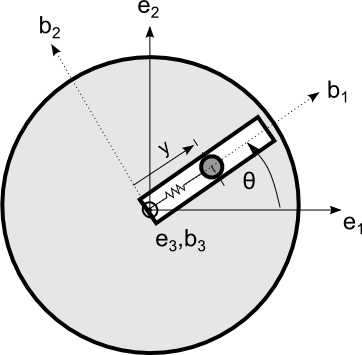

**24)**

\begin{align}
OP= bX \\
OP = b \begin{bmatrix}y \\ 0 \\ 0 \end{bmatrix}
\end{align} \\
By differentiating we can obtain,
\begin{align}
\dot{X} = \begin{bmatrix}\dot{y} \\ 0 \\ 0 \end{bmatrix}
\end{align} \\
By differentiating we can obtain,
\begin{align}
\ddot{X} = \begin{bmatrix}\ddot{y} \\ 0 \\ 0 \end{bmatrix}
\end{align} \\
By applying Newton's equation in b frame.
\begin{align}
F = \begin{bmatrix}-k(y-y_0) \\ 0 \\ 0 \end{bmatrix} + \begin{bmatrix}0 \\ N_2 \\ 0 \end{bmatrix} + \begin{bmatrix}0 \\ 0 \\ -mg+N_3 \end{bmatrix}
\end{align} \\
Then inorder to find the rotational matrix,
\begin{align}
R_3(\theta) = \begin{bmatrix}cos\theta & -sin\theta & 0\\ sin\theta & cos\theta & 0 \\ 0 & 0 & 1 \end{bmatrix}
\end{align} \\
We know that $x=RX$ and $R$ has the relationship $R^T\dot{R}=\widehat{\Omega}$. From that we can obtain relationships as,
\begin{align}
\dot{x} &= R(\widehat{\Omega}X+\dot{X}) \\
\ddot{x} &= R\left(\widehat{\Omega}^2X+2\widehat{\Omega}\dot{X}+\dot{\widehat{\Omega}}X+\ddot{X}\right)
\end{align} \\
\begin{align}
m\ddot{x}=f=RF \\
m\ddot{x} = \begin{bmatrix}-k(y-y_0)cos\theta \\ -k(y-y_0)sin\theta \\ 0 \end{bmatrix} + \begin{bmatrix}-N_2sin\theta  \\ N_2cos\theta \\ 0 \end{bmatrix} + \begin{bmatrix}0 \\ 0 \\ -mg+N_3 \end{bmatrix}
\end{align} \\
We can see that,
\begin{align}
R_3^T\dot{R}_3=\widehat{\Omega}=\dot{\theta}\left[\begin{array}{ccc}
0 & -1 & 0\\
1 & 0 &0\\
0 & 0 & 0
\end{array}\right]\\
\widehat{\Omega}^2=-\dot{\theta}^2\left[\begin{array}{ccc}
1 & 0 & 0\\
0 & 1 & 0\\
0 & 0 & 0
\end{array}\right].
\end{align} \\

\begin{align}
\widehat{\Omega}^2X &= -\dot{\theta}^2 \begin{bmatrix} y \\ 0 \\ 0 \end{bmatrix} \\
\widehat{\Omega}\dot{X} &= \dot{\theta}\begin{bmatrix} 0 \\ \dot{y} \\ 0 \end{bmatrix} \\
\dot{\widehat{\Omega}}X &= \ddot{\theta}\begin{bmatrix} 0 \\ y \\ 0 \end{bmatrix}
\end{align}\\

\begin{align}
f&= m\ddot{x} \\
f&= mR\left(\widehat{\Omega}^2X+2\widehat{\Omega}\dot{X}+\dot{\widehat{\Omega}}X+\ddot{X}\right) \\
m\ddot{X} &= R^Tf - (\widehat{\Omega}^2X+2\widehat{\Omega}\dot{X}+\dot{\widehat{\Omega}}X) \\
m\ddot{X} &= F - m(\widehat{\Omega}^2X+2\widehat{\Omega}\dot{X}+\dot{\widehat{\Omega}}X) \\
m \begin{bmatrix}\ddot{y} \\ 0 \\ 0 \end{bmatrix} &= \begin{bmatrix}-k(y-y_0) \\ N_2 \\ -mg+N_3 \end{bmatrix}  - m\left ( -\dot{\theta}^2 \begin{bmatrix} y \\ 0 \\ 0 \end{bmatrix} + 2\dot{\theta}\begin{bmatrix} 0 \\ \dot{y} \\ 0 \end{bmatrix} +  \ddot{\theta}\begin{bmatrix} 0 \\ y \\ 0 \end{bmatrix} \right)
\end{align} \\
Therefor we can obtain the $N_2$ by,
\begin{align}
N_2 = M(\dot{2\theta}\dot{y} + \ddot{\theta}y)
\end{align}

In [ ]:
m=0.0175;
y=0.011;
I=np.array([[1,0,0],[0,1,0],[0,0,1]]);
X=np.array([[y],[0],[0]]);
Xnorm=np.linalg.norm(X);
XT=np.transpose(X);
pi= m*(Xnorm**2*I - X@X.T );
pi

array([[0.0000e+00, 0.0000e+00, 0.0000e+00],
       [0.0000e+00, 2.1175e-06, 0.0000e+00],
       [0.0000e+00, 0.0000e+00, 2.1175e-06]])

In [ ]:
m = 0.0175; g = 9.806; k = 0.035; d = 0.14; w = 1.5; y =0.018; yd = 0.05; t = 0.7;
thetad = -(np.sin(w*t))*w
thetadd = -(np.cos(w*t))*w**2
N1 = -m*(thetad*yd+thetadd*y)
thetad
N1

In [ ]:
thetadd

In [ ]:
ydd = y*(thetad)**2 - (k/m)*(y)
ydd

In [ ]:
import numpy as np
from sympy import symbols
from sympy import Matrix
from numpy import linalg

theta=np.cos(w*t)

R = np.array([[np.cos(theta), -np.sin(theta), 0],[np.sin(theta), np.cos(theta), 0], [0,0,1]])
R     

array([[ 0.87874447, -0.47729252,  0.        ],
       [ 0.47729252,  0.87874447,  0.        ],
       [ 0.        ,  0.        ,  1.        ]])

In [ ]:
from sympy import symbols
from sympy import Matrix

PI = Matrix([[-m*d*yd], [-m*d*thetad*y], [m*y*thetad*y]])
PI

⎡      -0.000525      ⎤
⎢                     ⎥
⎢0.000819714948186346 ⎥
⎢                     ⎥
⎣-0.000351306406365577⎦

In [ ]:
pi = R@PI
pi

⎡-0.000852584662310374⎤
⎢                     ⎥
⎢0.000469741407450151 ⎥
⎢                     ⎥
⎣-0.000351306406365577⎦

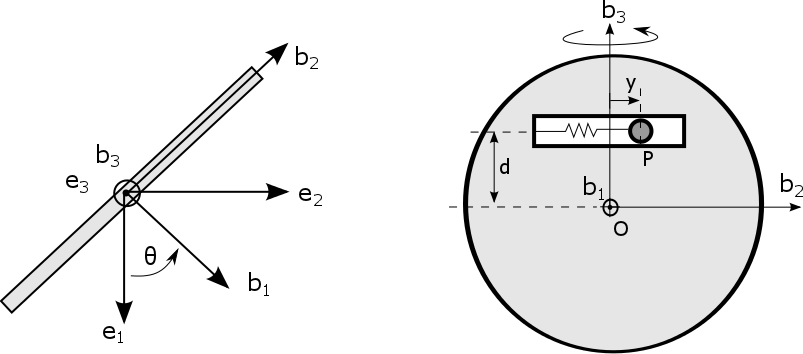

**25)** \\
\begin{align}
OP=\mathbf{b}\,\underbrace{\begin{bmatrix}0\\y\\d
\end{bmatrix}}_{X}
\end{align}

Velocity in the $\mathbf{b}$ frame

\begin{align}
\dot{X}=\begin{bmatrix}0\\\dot{y}\\0
\end{bmatrix}
\end{align}

Acceleration in the $\mathbf{b}$ frame

\begin{align}
\ddot{X}=\begin{bmatrix}0\\\ddot{y}\\0
\end{bmatrix}
\end{align}

Apply Newton's equations in the $\mathbf{b}$ frame

\begin{align}
\begin{bmatrix}0\\ -k(y-y_0)\\ 0
\end{bmatrix}+\begin{bmatrix}N_1\\ 0\\ 0
\end{bmatrix}+\begin{bmatrix}0\\ 0\\ -mg+N_3
\end{bmatrix}=F
\end{align}

Equalit holds only if the disk is not rotating with respect to $\mathbf{e}$. That is only if $\mathbf{b}$ is fixed with respect to $\mathbf{e}$.

However we know $x(t)=RX$ where in this case $R=R_3(\theta)$ where we will see below that
\begin{align}
R_3{(\theta)}=\left[\begin{array}{ccc}
\cos{\theta} & -\sin{\theta} & 0\\
\sin{\theta} & \cos{\theta} &0\\
0 & 0 & 1
\end{array}\right].
\end{align} 

Now differentiating $x(t)=RX$ and noting that $R^T\dot{R}=\widehat{\Omega}$ is a skew symmetric matrix (see below questions) we have
\begin{align}
\dot{x}&=R\left(\widehat{\Omega}X+\dot{X}\right),\\
\ddot{x}&=R\left(\widehat{\Omega}^2X+2\widehat{\Omega}\dot{X}+\dot{\widehat{\Omega}}X+\ddot{X}\right)
\end{align}
If we assume that $\mathbf{e}$ is an inertial frame then $m\ddot{x}=f$ where saw above that
\begin{align}
f=\begin{bmatrix}-k(y-y_0)\sin{\theta}\\-k(y-y_0)\cos{\theta}\\ 0
\end{bmatrix}+\begin{bmatrix}N_1\cos{\theta}\\-N_1\sin{\theta}\\ 0
\end{bmatrix}+\begin{bmatrix}0\\0\\-mg+N_3
\end{bmatrix}
\end{align}
Thus we have 
\begin{align}
m\ddot{x}&=mR\left(\widehat{\Omega}^2X+2\widehat{\Omega}\dot{X}+\dot{\widehat{\Omega}}X+\ddot{X}\right)=f
\end{align}
and hence that
\begin{align}
m \ddot{X}=-mR\left(\widehat{\Omega}^2X+2\widehat{\Omega}\dot{X}+\dot{\widehat{\Omega}}X\right)+R^Tf
\end{align}
Notice that
\begin{align}
R^Tf&= \begin{bmatrix}0\\ -k(y-y_0)\\ 0
\end{bmatrix}+\begin{bmatrix}N_1\\0\\ 0
\end{bmatrix}+\begin{bmatrix}0\\ 0\\ -mg+N_3
\end{bmatrix}=F
\end{align}
is the $\mathbf{b}$ frame representation of the resultant interaction force on the object.

Thus we finally have 
\begin{align}
m \ddot{X}=-m\left(\widehat{\Omega}^2X+2\widehat{\Omega}\dot{X}+\dot{\widehat{\Omega}}X\right)+F
\end{align}

Below we will see that
\begin{align}
R_3^T\dot{R}_3=\widehat{\Omega}=\dot{\theta}\left[\begin{array}{ccc}
0 & -1 & 0\\
1 & 0 &0\\
0 & 0 & 0
\end{array}\right]\\
\widehat{\Omega}^2=-\dot{\theta}^2\left[\begin{array}{ccc}
1 & 0 & 0\\
0 & 1 & 0\\
0 & 0 & 0
\end{array}\right].
\end{align}

Thus
\begin{align}
\widehat{\Omega}\dot{X}=\dot{\theta}\left[\begin{array}{ccc}
0 & -1 & 0\\
1 & 0 &0\\
0 & 0 & 0
\end{array}\right]\begin{bmatrix}0\\\dot{y}\\0
\end{bmatrix}=\begin{bmatrix}-\dot{\theta}\dot{y}\\0\\0
\end{bmatrix}\\
\widehat{\Omega}^2X=-\dot{\theta}^2\left[\begin{array}{ccc}
1 & 0 & 0\\
0 & 1 & 0\\
0 & 0 & 0
\end{array}\right]\begin{bmatrix}0\\{y}\\d
\end{bmatrix}=\begin{bmatrix}0\\-{y}\dot{\theta}^2\\0
\end{bmatrix}.
\end{align}

Thus we have
\begin{align}
m\begin{bmatrix}0\\\ddot{y}\\0
\end{bmatrix}&=
-m\left(\begin{bmatrix}0\\-{y}\dot{\theta}^2\\0
\end{bmatrix}
+2\begin{bmatrix}-\dot{\theta}\dot{y}\\0\\0
\end{bmatrix} +\begin{bmatrix}-\ddot{\theta}{y}\\0\\0
\end{bmatrix} \right)+\begin{bmatrix} N_1\\-k(y-y_0)\\ -mg+N_3
\end{bmatrix}
\end{align}
\begin{align}
m\begin{bmatrix}0\\\ddot{y}\\0
\end{bmatrix}&=
-m\begin{bmatrix}0\\-{y}\dot{\theta}^2\\0
\end{bmatrix}
-2m\begin{bmatrix}-\dot{\theta}\dot{y}\\0\\0
\end{bmatrix} -m\begin{bmatrix}-\ddot{\theta}{y}\\0\\0
\end{bmatrix}+\begin{bmatrix} N_1\\-k(y-y_0)\\ -mg+N_3
\end{bmatrix}
\end{align}
This gives us again
\begin{align}
N_1&=-m(2\dot{y}\,\dot{\theta}+\ddot{\theta}\,y)\\
N_3 &=mg
\end{align}
and that the equations of motions are given by
\begin{align}
m\ddot{y}&=m\dot{\theta}^2\,y-k(y-y_0).
\end{align}

\begin{align}
\ddot{y}&=\dot{\theta}^2\,y-\frac{k}{m}(y-y_0).
\end{align}

In [ ]:
m = 0.05; g = 9.806; k = 0.02; d = 0.12; w = 1.7; y = 0.06; yd = 0.03; t = 0.1;
#thetad = d(theta)
#thetadd = dd(theta)
#ydd = dd(y)
#yd = d(y)
thetad = -(math.sin(w*t))*w
thetadd = -(math.cos(w*t))*w**2
N1 = -m*(2*thetad*yd+thetadd*y)
N1

In [ ]:
ydd = y*(thetad)**2 - (k/m)*(y)
ydd

\begin{align}
\Pi = -m\widehat{X}^2\Omega + m\widehat{X}\dot{X}
\end{align} \\
where,
\begin{align}
\widehat{X}^2= ||X||^2\times I_{3\times3} - XX^T
\end{align}

In [ ]:
X=np.array([[0],[y],[d]]);
dX=np.array([[0],[yd],[0]]);
I=np.array([[1,0,0],[0,1,0],[0,0,1]]);
hatX = np.array([[0,-d,y],[d,0,0],[-y,0,0]]);
hatXsq = np.linalg.norm(X)**2*I- X@X.T

Ip = -m*hatXsq;

Omega= np.array([[0],[0],[thetad]]);

PI= Ip@Omega + m*hatX@dX;
PI

array([[-1.80000000e-04],
       [-1.03539598e-04],
       [ 5.17697988e-05]])

\begin{align}
\pi= R\Pi
\end{align}

In [ ]:
theta=math.cos(w*t*180/np.pi);
s=math.sin(theta);
c=math.cos(theta)
R=np.array([[c,-s,0],[s,c,0],[0,0,1]]);

pi=R@PI;
pi

array([[-1.88868477e-04],
       [ 8.63084396e-05],
       [ 5.17697988e-05]])

**26)**

In [ ]:
dtheta,dphi,dx,theta,phi,y,t,d=symbols('{\dot{\u03B8}},{\dot{\phi}},dx,theta,phi,y,t,d');
R_1=Matrix([[cos(theta),-sin(theta), 0],[ sin(theta),cos(theta), 0],[0, 0, 1]])
R_2=Matrix([[1,0,0],[0,cos(phi),-sin(phi)],[0,sin(phi), cos(phi)]])

In [ ]:
R=R_1@R_2

In [ ]:
dR = dtheta*diff(R,theta) + dphi*diff(R,phi)
dR

⎡-{\dot{θ}}⋅sin(θ)  {\dot{\phi}}⋅sin(φ)⋅sin(θ) - {\dot{θ}}⋅cos(φ)⋅cos(θ)   {\d
⎢                                                                             
⎢{\dot{θ}}⋅cos(θ)   -{\dot{\phi}}⋅sin(φ)⋅cos(θ) - {\dot{θ}}⋅sin(θ)⋅cos(φ)  -{\
⎢                                                                             
⎣        0                           {\dot{\phi}}⋅cos(φ)                      

ot{\phi}}⋅sin(θ)⋅cos(φ) + {\dot{θ}}⋅sin(φ)⋅cos(θ) ⎤
                                                  ⎥
dot{\phi}}⋅cos(φ)⋅cos(θ) + {\dot{θ}}⋅sin(φ)⋅sin(θ)⎥
                                                  ⎥
             -{\dot{\phi}}⋅sin(φ)                 ⎦

In [ ]:
D1 = dR.subs(theta,2.1)
D2 = D1.subs(phi,2.9)
D3 = D2.subs(dtheta,0.17)
DR = D3.subs(dphi,-0.12)
DR

⎡-0.146745592330309   -0.10811402749192  0.0800435263138523⎤
⎢                                                          ⎥
⎢-0.0858238377819758  0.127989740047009  0.0939309182187583⎥
⎢                                                          ⎥
⎣         0           0.116514979817951  0.0287099195056779⎦

In [ ]:
D11 = R.subs(theta,2.1)
R = D11.subs(phi,2.9)
R

⎡-0.504846104599858  0.838140182781331   0.20652226194197 ⎤
⎢                                                         ⎥
⎢0.863209366648874   0.490184447405196  0.120784091881808 ⎥
⎢                                                         ⎥
⎣        0           0.239249329213982  -0.970958165149591⎦

In [ ]:
OmegaHat=  R.T @ DR
print(OmegaHat)

Matrix([[0, 0.165062888075430, 0.0406723859663770], [-0.165062888075430, 6.93889390390723e-18, 0.120000000000000], [-0.0406723859663770, -0.120000000000000, 3.46944695195361e-18]])


In [ ]:
Omegahat=np.array([[0, 0.165062888075430, 0.0406723859663770], [-0.165062888075430, 6.93889390390723e-18, 0.120000000000000], [-0.0406723859663770, -0.120000000000000, 3.46944695195361e-18]])
Omega=np.array([[Omegahat[2][1],Omegahat[0][2],Omegahat[1][0]]])
Omega

array([[-0.12      ,  0.04067239, -0.16506289]])

**26)** Check the: ME320 Description of motion of moving frames.

In [ ]:
phi=1.1; theta=1.1; dphi=-0.01; dtheta=-0.13; m=0.0125;
y=0.015; dy=0.07; d=0.018;

Omega= np.array([[dphi],[-dtheta*math.sin(phi * 180/np.pi)],[dtheta*math.cos(phi * 180/np.pi)]]);
Omega

array([[-0.01      ],
       [ 0.02499888],
       [-0.12757373]])

In [ ]:
St=math.sin(theta * 180/np.pi)
Ct=math.cos(theta * 180/np.pi)
Sp=math.sin(phi * 180/np.pi)
Cp=math.cos(phi * 180/np.pi)

R=np.array([[Ct, -St, St*Sp],
            [St, Ct*Cp, -Ct*Sp],
            [0, Sp, Cp]])

X=np.array([[0],[y],[d]])
dX= np.array([[0],[dy],[0]])

I=np.array([[1,0,0],[0,1,0],[0,0,1]]);
hatX = np.array([[0,-d,y],[d,0,0],[-y,0,0]]);
hatXsq = np.linalg.norm(X)**2*I- X@X.T

Ip = -m*hatXsq;

PI= Ip@Omega + m*hatX@dX;
pi=R@PI
pi

array([[-1.52700497e-05],
       [-3.61128584e-06],
       [ 3.32635175e-07]])

**27)** \\
Since the particles are isolated from rest of the universe and allowed to interact with each other, we can say that \\
\begin{gather}
\dot{\bar{x}}&\triangleq \frac{\sum_{i=1}^{n}m_i\dot{x}_i}{\sum_{i=1}^{n}m_i} = Constant
\end{gather}
i.e the center of mass of the particle system will always move at a constant velocity because of the conservation of linear momentum.  \\
 \\
Tthe angular momentum for the $i^{th}$ particle in a set of particles around $o$ will be,
\begin{gather}
\dot{\pi}_i \triangleq (x_i - o) \times p_i = (x_i-o) \times (m_i \dot{x}_i)
\end{gather}
By differentiating the above equation \\
\begin{gather}
\dot{\pi}_i \triangleq (- \dot{o} \times m_i \dot{x}_i) + (x_i-o) \times f_i   \space \space \leftarrow [A]
\end{gather} \\
But we know that by considering the force acting on a particle due to the interactions made by the other particles in the system and the rest of the particles in the universe, we can write overall force acting on the particle as,
\begin{gather}
f_i=f_i^e+\sum_{j\neq i}^nf_{ij}
\end{gather}
And the forces acting being equal and opposite, and they being lieing on a straight line gives us,
\begin{gather}
f_{ji}=-f_{ij} \\
(x_i-o)\times  f_{ij}=-(x_j-o)\times  f_{ji}
\end{gather} \\
By this we derive an equation for the torque applied on a particle as,
\begin{equation}
\tau_i \triangleq (x_i-o)\times f_i \\
\sum_{i=1}^n\tau_i=\sum_{i=1}^n(x_i-o)\times f_i \\
\sum_{i=1}^n\tau_i=\sum_{i=1}^n(x_i-o)\times  f_{i}^e+\sum_{i=1}^n\sum_{j\neq i}^n(x_i-o)\times  f_{ij} \\
\sum_{i=1}^n\tau_i=\sum_{i=1}^n(x_i-o)\times  f_{i}^e
\end{equation}
We can redefine the above equation as,
\begin{equation}
\sum_{i=1}^n\tau^e=\sum_{i=1}^n(x_i-o)\times  f_{i}^e
\end{equation} 
 \\
And we can re-write the equation $A$ to get the rate of change of angular momentum by considering the $n$ number of particles,
\begin{gather}
\dot{\pi} \triangleq - \dot{o} \times \sum_{i=1}^n m_i \dot{x}_i + \sum_{i=1}^n(x_i-o)\times  f_{i}^e+\sum_{i=1}^n\sum_{j\neq i}^n(x_i-o)\times  f_{ij}  \\
\dot{\pi} \triangleq - \dot{o} \times \sum_{i=1}^n m_i \dot{x}_i + \tau^e \\
\dot{\pi} \triangleq - M\dot{o}\times \dot{\bar{x}}+\tau^e
\end{gather}
$\dot{\pi} = \tau^e $ if,
* $\dot{o}=0$ or
* $\dot{\bar{x}} = 0 $ or
* $O = O_c$ where, $O_c$ is the center of mass of the object \\
But these won't be valid for every inertial observer. \\

By all said, we can see that for all the intertial observers: The angular momentum of set of particles which are isolated but interacting with each other will be conserved and will have a constant value.


**29)** \\
Let $X$ be the representation of a point $P$ onthe frame $b$ and $x$ be the representation of same point $P$ in the frame $e$. The Particle will be stationary respective to frame $b$, therefor the $X$ will be independent of time $t$, but $R$ will be changing with the time. Since the relationship between he two frames is gives by $b=eR$, we can write the relationship between $x$ and $X$ as,
\begin{align*}
x(t)=R(t)X
\end{align*} \\
Similar way we can represent the quantity $\bar{x}'=(\bar{x}-o)$ with respect to the $\bar{X}'$ as,
\begin{align*}
\bar{x}'(t)=R(t)\bar{X}'
\end{align*}
Then by differentiating with respect to time,
\begin{align*}
\dot{\bar{x}}'&=\dot{R}\bar{X}' \\
\dot{\bar{x}}'&=R\widehat{\Omega}\bar{X}' &\: &;  \widehat{\Omega}=R^T\dot{R} \\
\dot{\bar{x}}'&= R(\Omega \times \bar{X}') \\
\dot{\bar{x}}'&= R\Omega \times R\bar{X}' \\
\dot{\bar{x}}'&= R\Omega \times \bar{x}' \\
\dot{\bar{x}}'&= \omega \times \bar{x}' &\: &; \omega= R\Omega \\
\dot{\bar{x}}-\dot{o} &=  \omega \times \bar{x}' &\: &; \bar{x}'=(\bar{x}-o) \\ 
\dot{o} &= \dot{\bar{x}} - \omega \times \bar{x}' \\ 
\dot{o} &= \frac{1}{M}p - \omega \times \bar{x}' &\: &; p= M\dot{\bar{x}}
\end{align*} \\

---


Using the expressions $ \widehat{\Omega}=R^T\dot{R}$ and $\omega= R\Omega$
\begin{align*}
\widehat{\omega}{R} &= \widehat{R\Omega}R \\
\widehat{\omega}{R} &= R\widehat{\Omega}R^TR \\
\widehat{\omega}{R} &= RR^T\dot{R}R^TR \\
\widehat{\omega}{R} &= \dot{R} &; RR^T=R^TR=I
\end{align*} \\

---


We can write the linear momentum $p_i$ of $i^{th}$ particle as,
\begin{align*}
p_i&=m_i\dot{x}_i
\end{align*}
As $m_i$ is independent of time, we can differentiate the above equation with respect to time as,
\begin{align*}
\dot{p}_i&=m_i\ddot{x}_i
\end{align*}
Therefor we can obtain a relationship for the n number of particles as,
\begin{align*}
\sum^n_{i=1}\dot{p}_i&=\sum^n_{i=1}m_i\ddot{x}_i
\end{align*}
By the newton's second law,  $\sum^n_{i=1}m_i\ddot{x}_i=f^e$.Therefor,
\begin{align*}
\dot{p} &=f^e
\end{align*}

---

We can write the relationship for the angular momentum $\pi_i$ of a $i^{th}$ particle as,
\begin{align*}
\pi_i &= (x_i-o)\times p_i \\
\pi_i &= \bar{x}_i'\times p_i 
\end{align*}
By differentiating the above equation with respect to time we can find the rate of change of angular momentum.
\begin{align*}
\dot{\pi}_i &= (\dot{\bar{x}}_i'\times p_i )+ (\bar{x}_i'\times \dot{p}_i )
\end{align*}
We can then find the total rate of change of angular momentum $\dot{\pi}$ for $n$ number of particles as,
\begin{align*}
\sum_{i=1}^n\dot{\pi}_i &= \sum_{i=1}^n(\dot{\bar{x}}_i'\times p_i )+\sum_{i=1}^n(\bar{x}_i'\times \dot{p}_i ) \\
\dot{\pi} &= (\dot{\bar{x}}'\times p )+(\bar{x}'\times \dot{p} ) \\
\dot{\pi} &= (\omega \times \bar{x}' \times p )+((\bar{x}-o)\times f^e ) &;\dot{\bar{x}}'= \omega \times \bar{x}' &, \bar{x}'=(\bar{x}-o) \\
\dot{\pi} &= (\omega \times \bar{x}' \times p )+(\tau^e ) &; (\bar{x}-o)\times f^e = \tau^e
\end{align*}



---

**30)** \\ 
By multiplying both sides of the equation $\widehat{\Omega}=R^T\dot{R}$ by $R$,
\begin{align*}
R\widehat{\Omega}&=(RR^T)\dot{R} \\
R\widehat{\Omega}&=\dot{R} &;  RR^T =I
\end{align*}

---

can write the relationship between $x$ and $X$ for $i^{th}$ particle using $o$ and $R$ as,
\begin{align*}
x_i(t) = o(t) + R(t)X_i
\end{align*}
Since $X_i$ is the representaion of particle in $b$ frame it won't depend on time. \\
Therefor we can write a relationship for the center of mass of the particle with respective to frame $b$ and frame $e$ as,
\begin{align*}
\bar{x}(t) = o(t) + R(t)\bar{X} &\: &\rightarrow (A)
\end{align*} 
Where,
\begin{align*}
\bar{X} = \frac{\sum^n_{i=1}m_iX_i}{\sum^n_{i=1}m_i}
\end{align*} \\
Then we will differentiate the equation $A$ with respect to time,
\begin{align*}
\dot{\bar{x}} &= \dot{o} + \dot{R}\bar{X} \\
\dot{\bar{x}} &= \dot{o} + R\widehat{\Omega}(t)\bar{X} &; \dot{R}=R\widehat{\Omega}(t)&\: &[by \:\:\: \widehat{\Omega}(t)=R^T\dot{R}]
\end{align*} \\
Then we differentiate the above equation again with respect to time,
\begin{align*}
\ddot{\bar{x}} &= \ddot{o} + (\dot{R}\widehat{\Omega}(t)+ R\dot{\widehat{\Omega}}(t))\bar{X} \\
\ddot{\bar{x}} &= \ddot{o} + (R\widehat{\Omega}(t)\widehat{\Omega}(t)+ R\dot{\widehat{\Omega}}(t))\bar{X} &; \dot{R}=R\widehat{\Omega}(t)&\: &[by \:\:\: \widehat{\Omega}(t)=R^T\dot{R}] \\
\ddot{\bar{x}} &= \ddot{o} + R(\widehat{\Omega}^2+ \dot{\widehat{\Omega}}(t))\bar{X} 
\end{align*} \\
But we know that from the rate of change of linear momentum, $\dot{p}=M\ddot{\bar{x}}=f^e$. This can be re-written using the relationship obtained above as,
\begin{align*}
M(\ddot{o} + R(\widehat{\Omega}^2+ \dot{\widehat{\Omega}}(t))\bar{X})=f^e
\end{align*}
Then multiply both sides by $R^T$,
\begin{align*}
M(R^T\ddot{o} + R^TR(\widehat{\Omega}^2(t)+ \dot{\widehat{\Omega}}(t))\bar{X})&=R^Tf^e \\
MR^T\ddot{o} + M(\widehat{\Omega}^2(t)+ \dot{\widehat{\Omega}}(t))\bar{X}&=F^e &; R^Tf^e=F^e &\: &,R^TR=I \\
MR^T\ddot{o} + M\dot{\widehat{\Omega}}\bar{X} &= -M\widehat{\Omega}^2(t)\bar{X} + F^e \\
MR^T\ddot{o} + M(\dot{\Omega}\times\bar{X}) &= -M\widehat{\Omega}^2(t)\bar{X} + F^e \\
MR^T\ddot{o} - M(\bar{X}\times\dot{\Omega}) &= -M\widehat{\Omega}^2(t)\bar{X} + F^e \\
MR^T\ddot{o} - M\widehat{\bar{X}}\dot{\Omega} &= -M\widehat{\Omega}^2(t)\bar{X} + F^e
\end{align*}

---

The angular momentum $\pi_i$ of a $i^{th}$ particle can be represented as,
\begin{align*}
\pi_i &= m_i(x_i-o)\times \dot{x}_i \\
&= m_iR(X_i \times (\Omega\times X_i + \dot{X}_i + R^T\dot{o})) \\
&= R(-m_i\widehat{X_i}^2\Omega + m_iX_i\times (R^T\dot{o}+\dot{X}_i))
\end{align*} 
Where,
\begin{align*}
\widehat{X_i}\times \Omega \times \widehat{X_i} &= -\widehat{X_i} \times \widehat{X_i} \times \Omega = -\widehat{X_i}^2\Omega \\
\end{align*} \\
The quantity,
\begin{align*}
\mathbb{I}_i = -m_i\widehat{X}_i^2= m_i\left(||X_i||^2I_{3\times 3} - X_iX_i^T\right)
\end{align*}
represents the moment of inertia of particle $P$ about the $O'$ in the frame $b$. Therefor, we can express the angular momentum of $P$ about $O'$ as,
\begin{align*}
\pi_i &= R(\mathbb{I}_i\Omega + m_iX_i\times (R^T\dot{o}+\dot{X}_i))
\end{align*}
from above expression we can obtain the angular momentum in the moving frame $b(t)$,
\begin{align*}
\Pi_i &\triangleq (\mathbb{I}_i\Omega + m_iX_i\times (R^T\dot{o}+\dot{X}_i))
\end{align*} \\
Considering the case where the particle $P_i$ appears fixed in the frame $b$ when $\dot{X}_i=0$, we differentiate the expression for $\Pi$ using the Jacobian property of cross products:
\begin{align*}
A\times B\times C + B\times C\times A + C\times A\times B = 0
\end{align*}
We get,
\begin{align*}
\dot{\pi}_i &= R(\mathbb{I}_i\dot{\Omega}-\mathbb{I}_i\Omega\times \Omega - m_i(R^T\dot{o})\times \Omega \times X_i + m_iX_i\times R^T\ddot{o})
\end{align*} \\
Then we differentiate $\pi_i = m_i(x_i-o)\times \dot{x}_i$ to get,
\begin{align*}
\dot{\pi}_i = R(-m_i(R^T\ddot{o})\times \Omega \times X_i + X_i\times F_i)
\end{align*}
where,
* $F_i = R^Tf_i$ is the representation of force acting on particle $P$ in frame $b$
* $T_i=X_i\times F_i=R^T((x_i-o)\times f_i)$ is the representation of moment of force acting on $P$ about $o$ in the moving frameb $b(t)$. 

Then we can join the last two expression as,
\begin{align*}
\mathbb{I}_i\dot{\Omega} = \mathbb{I}_i\Omega\times \Omega-m_iX_i\times R^T\ddot{o}+X_i\times F_i
\end{align*} \\
therefor for $n$ number of particles we can obtain the epxression as,
\begin{align*}
\sum^n_{i=1}\mathbb{I}_i\dot{\Omega} &= \sum^n_{i=1}\left ( \mathbb{I}_i\Omega\times \Omega-m_iX_i\times R^T\ddot{o}+X_i\times F_i \right ) \\
\dot{\Omega}\sum^n_{i=1}\mathbb{I}_i &= \sum^n_{i=1} (\mathbb{I}_i\Omega\times \Omega)-\sum^n_{i=1} (m_iX_i)\times R^T\ddot{o}+\sum^n_{i=1} (X_i\times F_i ) \\
\mathbb{I}\dot{\Omega} &= \mathbb{I}\Omega\times \Omega - M\bar{X}\times R^T\ddot{o} + \sum^n_{i=1} (T_i^e ) \\
\mathbb{I}\dot{\Omega} &= \mathbb{I}\Omega\times \Omega - M\bar{X}\times R^T\ddot{o} + T^e
\end{align*} \\
where
\begin{align*}
\bar{X}&=\frac{\sum^n_{i=1} m_iX_i}{\sum^n_{i=1} m_i} \\
\bar{X}&=\frac{\sum^n_{i=1} m_iX_i}{M} \\
M\bar{X}&=\sum^n_{i=1} m_iX_i \\
 \\
X_i\times F_i &= T_i^e
\end{align*} \\
If $O$ is fixed, then $\dot{o}=0$, therefor $\ddot{o}=0$. Therefor we can show that the rotational motion of rigid body about $O$ willl be goverened by,
\begin{align*}
\mathbb{I}\dot{\Omega} &= \mathbb{I}\Omega\times \Omega  + T^e
\end{align*} \\
By the expression $MR^T\ddot{o} + M(\widehat{\Omega}^2(t)+ \dot{\widehat{\Omega}}(t))\bar{X}=F^e$ ,
\begin{align*}
R^T\ddot{o} = \frac{-M \left (\widehat{\Omega}^2(t)+ \dot{\widehat{\Omega}}(t)\right )\bar{X}+F^e}{M}
\end{align*} \\
Then we can re-write the equation $\mathbb{I}\dot{\Omega} = \mathbb{I}\Omega\times \Omega - M\bar{X}\times R^T\ddot{o} + T^e$ by replacing $R^T\ddot{o} $as,
\begin{align*}
\mathbb{I}\dot{\Omega} = \mathbb{I}\Omega\times \Omega - \bar{X}\times \left (-M \left (\widehat{\Omega}^2(t)+ \dot{\widehat{\Omega}}(t)\right )+ F_e\right )\bar{X} + T^e &\: &\rightarrow (B)
\end{align*} \\
Then we can simplify the above equation more as,
\begin{align*}
\bar{X}\times \widehat{\Omega}^2\bar{X} &= \widehat{\bar{X}} \left ( \Omega \Omega^T - ||\Omega||^2I_{3\times 3}\right ) \\
&= \widehat{\bar{X}}\Omega(\Omega.\bar{X}) \\
&= -\widehat{\Omega}\bar{X}\bar{X}^T\Omega \\
&= -\widehat{\Omega} \left ( \bar{X}\bar{X}^T - ||\bar{X}||^2I_{3\times 3}\right ) \\
&= -\Omega \times \widehat{\bar{X}}^2\Omega
\end{align*} \\
Then we can re-write the equation $B$ as,
\begin{align*}
\mathbb{I}\dot{\Omega} - \bar{X}\times M\dot{\Omega}\bar{X}  &= \mathbb{I}\Omega\times \Omega + \bar{X}\times M\widehat{\Omega}^2(t)\bar{X} -\bar{X}\times F_e + T^e \\
(\mathbb{I} + M\widehat{\bar{X}}^2 )\dot{\Omega} &= \mathbb{I}\Omega\times \Omega - \Omega \times M\widehat{\bar{X}}^2\Omega -\bar{X}\times F_e+ T^e \\
(\mathbb{I} + M\widehat{\bar{X}}^2 )\dot{\Omega} &= (\mathbb{I} + M\widehat{\bar{X}}^2) \Omega \times \Omega -\bar{X}\times F_e+ T^e \\
\mathbb{I}_c\dot{\Omega} &= \mathbb{I}_c\Omega \times \Omega -\bar{X}\times F_e+ T^e \rightarrow (C) &; \mathbb{I}_c \triangleq \mathbb{I} + M\widehat{\bar{X}}^2
\end{align*} \\
Let $o_c$ be the center of mass of the body representation with respect to the frame $e$.Therefor resultat moment of external forces will be,
\begin{align*}
\tau_c^e = \sum^n_{i=1} (x_i-o_c)\times f_i^e
\end{align*}
as $\bar{X}=R^T(o_c-o)$ ,
\begin{align*}
\tau^e &= \sum^n_{i=1} (x_i-o)\times f_i^e \\
&= \sum^n_{i=1} (x_i-o_c+o_c-o)\times f_i^e \\
&= \sum^n_{i=1} (x_i-o_c)\times f_i^e +\sum^n_{i=1} (o_c-o)\times f_i^e \\
&= \tau_c^e + R\bar{X}\times f^e \\
&= \tau_c^e + R(\bar{X}\times F^e) \\
R^T\tau^e &= R^T\tau_c^e + (\bar{X}\times F^e) \\
T^e - (\bar{X}\times F^e) &= T_c^e
\end{align*} \\
Then we can re-write the equation $C$ as,
\begin{align*}
\mathbb{I}_c\dot{\Omega} &= \mathbb{I}_c\Omega \times \Omega + T_c^e
\end{align*}

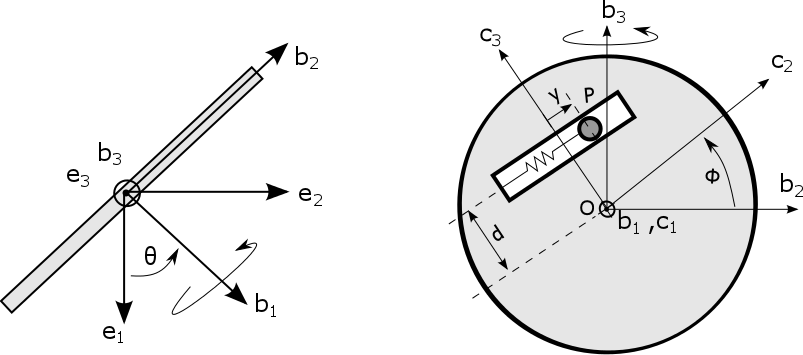

**32)** Mugas Classical mechanics - Colab last part

**33)** \\ 
Considering the figure we can make relationship for the 3 frames $e,b,c$ as,
\begin{align*}
c=bR_1(\phi) \\
b=eR_3(\theta)
\end{align*} 
where the two rotaional matrices can be written as,
\begin{align*}
R_1(\phi) &=\begin{bmatrix} 1 & 0 & 0 \\ 0 & cos(\phi) & -sin(\phi) \\ 0 & sin(\phi) & cos(\phi) \end{bmatrix} \\
R_3(\theta) &= \begin{bmatrix} cos(\theta) & -sin(\theta) & 0 \\ sin(\theta) & cos(\theta) & 0 \\ 0 & 0 & 1 \end{bmatrix}
\end{align*} \\

Then we can obtain the coresponding hat matrix for above rotational matrces as,
\begin{align*}
\widehat{\Omega}_1=R_1^T\dot{R}_1 = \begin{bmatrix} 1 & 0 & 0 \\ 0 & cos(\phi) & sin(\phi) \\ 0 & -sin(\phi) & cos(\phi) \end{bmatrix}\begin{bmatrix} 1 & 0 & 0 \\ 0 & -\dot{\phi}sin(\phi) & -\dot{\phi}cos(\phi) \\ 0 & \dot{\phi}cos(\phi) & -\dot{\phi}sin(\phi) \end{bmatrix} = \begin{bmatrix} 0 & 0 & 0 \\ 0 & 0 & -\dot{\phi} \\ 0 & \dot{\phi} & 0 \end{bmatrix} \\
\widehat{\Omega}_3=R_3^T\dot{R}_3 = \begin{bmatrix} cos(\theta) & sin(\theta) & 0 \\ -sin(\theta) & cos(\theta) & 0 \\ 0 & 0 & 1 \end{bmatrix} \begin{bmatrix} -\dot{\theta}sin(\theta) & -\dot{\theta}cos(\theta) & 0 \\ \dot{\theta}cos(\theta) & -\dot{\theta}sin(\theta) & 0 \\ 0 & 0 & 1 \end{bmatrix} = \begin{bmatrix} 0 & -\dot{\theta} & 0 \\ \dot{\theta} & 0 & 0 \\ 0 & 0 & 0 \end{bmatrix}
\end{align*} \\
We can write the relationship between $c$ and $e$ as,
\begin{align*}
c=bR_1 = (eR_3)R_1 = e(R_3R_1) = eR &\: &; R= R_3R_1
\end{align*} \\
Theerefor, positions can be related as,
\begin{align*}
ex= cX = eRX
\end{align*} \\
We can reperesent the position $OP$ in the frame $c$ as,
\begin{align*}
OP=\begin{bmatrix} 0 \\ y \\ d \end{bmatrix} =X
\end{align*}
By diffrentiating the above equation we can find the relationship for velocity in frame $c$,
\begin{align*}
\dot{X}=\begin{bmatrix} 0 \\ \dot{y} \\ 0 \end{bmatrix}
\end{align*}
Then we can obtain the acceleration in frame $c$ as,
\begin{align*}
\ddot{X}=\begin{bmatrix} 0 \\ \ddot{y} \\ 0 \end{bmatrix}
\end{align*} \\
The point $p$ with respect to frame an be represented as $x$ as follows by considering $3x=eRX$ relationship,
\begin{align*}
x=RX
\end{align*}
By differentiating above equation with respect to time, we can obtain the velocity with respect t o frame $e$,
\begin{align*}
\dot{x}&=\dot{R}X + R\dot{X} \\
\dot{x}&=R\widehat{\Omega} X + R\dot{X} &; \widehat{\Omega}=R^T\dot{R}
\end{align*}
By differentiating above equation with respect to time, we can obtain the accelaration with respect t o frame $e$,
\begin{align*}
\ddot{x}&=\dot{R}\widehat{\Omega} X + R(\dot{\widehat{\Omega}} X + \widehat{\Omega} \dot{X} )  + \dot{R}\dot{X} + R\ddot{X} \\
\ddot{x}&= {R}\widehat{\Omega}\widehat{\Omega} X + R\widehat{\Omega} \dot{X} + R\widehat{\Omega} \dot{X}+R\dot{\widehat{\Omega}} X + R\ddot{X} \\
\ddot{x}&= {R}(\widehat{\Omega}^2 X + 2\widehat{\Omega} \dot{X} + \dot{\widehat{\Omega}} X + \ddot{X} )
\end{align*} \\
where,
\begin{align*}
\widehat{\Omega} &= R^T\dot{R}  = (R^T_1\widehat{\Omega}_3R_1 + \widehat{\Omega}_1) \\
\widehat{\Omega} &= \begin{bmatrix} 0 & -\dot{\theta}cos(\phi) & \dot{\theta}sin(\phi) \\ \dot{\theta}cos(\phi) & 0 & -\dot{\phi} \\ -\dot{\theta}sin(\phi) & \dot{\phi} & 0  \end{bmatrix}
\end{align*} \\
By differentiating the above expression
\begin{align*}
\dot{\widehat{\Omega}} &= \begin{bmatrix} 0 & -\ddot{\theta}cos(\phi) + \dot{\theta}\dot{\phi}sin(\phi)  & \ddot{\theta}sin(\phi) + \dot{\theta}\dot{\phi}cos(\phi) \\ \ddot{\theta}cos(\phi)-\dot{\theta}\dot{\phi}sin(\phi) & 0 & -\ddot{\phi} \\ -\ddot{\theta}sin(\phi)-\dot{\theta}\dot{\phi}cos(\phi) & \ddot{\phi} & 0  \end{bmatrix}
\end{align*} \\
By squaring the expression
\begin{align*}
{\widehat{\Omega}}^2 &= \begin{bmatrix} -\dot{\theta}^2 & \dot{\theta}\dot{\phi}sin(\phi)  & \dot{\theta}\dot{\phi}cos(\phi) \\ \dot{\theta}\dot{\phi}sin(\phi) & -(\dot{\theta}^2cos^2(\phi) + \dot{\phi}^2)  & \dot{\theta}^2sin(2\phi)/2 \\ \dot{\theta}\dot{\phi}cos(\phi) & \dot{\theta}^2cos(2\phi)/2 & -(\dot{\theta}^2sin^2(\phi) + \dot{\phi}^2)  \end{bmatrix}
\end{align*} \\
 \\
By assuming that the earth fixed frame $e$ is inertial, we can use newton's equations to write anrelationship for the force $f$ as,
\begin{align*}
f &= m\ddot{x} \\
f &= m{R}(\widehat{\Omega}^2 X + 2\widehat{\Omega} \dot{X} + \dot{\widehat{\Omega}} X + \ddot{X} ) \\
R^Tf &=m(\widehat{\Omega}^2 X + 2\widehat{\Omega} \dot{X} + \dot{\widehat{\Omega}} X + \ddot{X} ) &\rightarrow (A)
\end{align*} \\
We can divide the fundermental forces acting into two parts as, forces withn the $c$ frame and forces from $e$ frame,
\begin{align*}
ef &= cF + ef_g \\
 &= eRF + ef_g \\
&=eR\begin{bmatrix} F_{N1}  \\ -ky \\ F_{N3}  \end{bmatrix} + e\begin{bmatrix} 0 \\ 0 \\ -mg  \end{bmatrix}
\end{align*} where,
$F_{N1}$ and $F_{N3}$ are forces acting in the $c_1$ and $c_3$ directions respectively. Therefor,
\begin{align*}
 f &= RF + f_g \\
 R^Tf &= F + R^Tf_g &\rightarrow (B)
\end{align*} \\
Therefor by combining $A$ and $B$,
\begin{align*}
F + R^Tf_g &= m(\widehat{\Omega}^2 X + 2\widehat{\Omega} \dot{X} + \dot{\widehat{\Omega}} X + \ddot{X} ) \\
\begin{bmatrix} F_{N1}  \\ -ky \\ F_{N3}  \end{bmatrix} - \begin{bmatrix} 0 \\ mgsin(\phi) \\ mgcos(\phi) \end{bmatrix} &= m\begin{bmatrix} \ddot{\theta}(dsin\phi - ycos\phi)-2\dot{\theta}\dot{y}cos\phi+2\dot{\phi}\dot{\theta}(dcos\phi+ysin\phi) \\ \ddot{y}-d\ddot{\phi}-y(\dot{\phi}^2+\dot{\theta}^2cos^2\phi) + d\dot{\theta}^2cos\phi sin\phi \\ \ddot{\phi}y + 2\dot{\phi}\dot{y}-d(\phi^2+\dot{\theta}^2sin^2\phi)+ y\dot{\theta}^2(cos2\phi)/2 \end{bmatrix}
\end{align*} \\
We can solve the above matrix expression to find the relationship for $F_{N1},F_{N3}$ by using the $1^{st}$ and $3^{rd}$ rows respectively. By solving $2^{nd}$ row,
\begin{align*}
-ky-mgsin\phi &= m(\ddot{y}-d\ddot{\phi}-y(\dot{\phi}^2+\dot{\theta}^2cos^2\phi) + d\dot{\theta}^2cos\phi sin\phi) \\
\ddot{y} + y(\frac{k}{m}-\dot{\phi}^2-\dot{\theta}^2cos^2\phi)-d\ddot{\phi}+ d\dot{\theta}^2cos\phi sin\phi + gsin\phi &= 0
\end{align*} \\
Therefor above equation will describe the motions of the particle. \\
And we can obtain th espressions for the forces as,
\begin{align*}
F_{N1} &= m \left ( \ddot{\theta}(dsin\phi - ycos\phi)-2\dot{\theta}\dot{y}cos\phi+2\dot{\phi}\dot{\theta}(dcos\phi+ysin\phi) \right ) \\
F_{N3} &= m \left (\ddot{\phi}y + 2\dot{\phi}\dot{y}-d(\phi^2+\dot{\theta}^2sin^2\phi)+ y\dot{\theta}^2(cos2\phi)/2 + gcos(\phi) \right )
\end{align*}

**34)** \\
The center of mass equations will be given by
\begin{align*}
\bar{X} &= \frac{m\bar{X}_p + M\bar{X}_d}{m+M} 
\end{align*}
where, 
\begin{align*}
\bar{X}_p = \begin{bmatrix} 0 \\ y(t) \\ d\end{bmatrix}
\end{align*}
Where, $m$ is mass of the bead and $M$ is mass of the disk. \\
we can find the $\bar{X}_d$ as,
\begin{align*}
\bar{X}_d &= \frac{\pi r^2h\rho\bar{X}_{disk} - (2b\times 2l\times h)\rho\bar{X}_{slot}}{\pi r^2h\rho- 2b\times 2l\times h\times\rho} \\
\bar{X}_d &= - \frac{4blh\rho \bar{X}_{slot}}{\pi r^2h\rho- 4blh\rho} &; \bar{X}_{disk}=0,\bar{X}_{slot}=\begin{bmatrix} 0 \\ 0\\ d\end{bmatrix}
\end{align*}

In [ ]:
d=0.18
r=0.25
h=0.0125
l=0.05
b=0.005
rho=2710
m=0.05
y=-0.07
import numpy as np

M= (np.pi*r**2*h*rho)-(4*b*l*h*rho)

Xd= -((4*b*l*h*rho)/M)*np.array([[0],[0],[d]])


Xd

array([[-0.        ],
       [-0.        ],
       [-0.00092143]])

moment of inertia of the tenso in frame $c$  can be found by the equation,
\begin{align*}
\mathbb{I}_i = m_i\left(||X_i||^2I_{3\times 3} - X_iX_i^T\right)
\end{align*}
The moment of inertia of disk will be calculated as,
\begin{align*}
\mathbb{I}_{disk} &= \mathbb{I}_{complete\: disk} - \mathbb{I}_{slot} + M\widehat{\bar{X}}^2
\end{align*}
where $M$ is the mass of the slot.

In [ ]:
X1=np.array([[0],[y],[d]])
X2= np.array([[0],[0],[d]])
I =  np.array([[1,0,0],[0,1,0],[0,0,1]])
M1=np.pi*r**2*h*rho

M2= 4*b*l*h*rho
I1= M1*np.array([[r**2/2,0,0],[0,(3*r**2+h**2)/12,0],[0,0,(3*r**2+h**2)/12]])
I2= M2*np.array([[(4*b**2 + 4*h**2)/12,0,0],[0,(4*b**2+l**2)/12,0],[0,0,(4*l**2+h**2)/12]])
In = I1-I2 +(M2*(np.linalg.norm(X2, np.inf)**2 * I)- X2 @ X2.T)
In

array([[0.2089499 , 0.        , 0.        ],
       [0.        , 0.10510401, 0.        ],
       [0.        , 0.        , 0.07268268]])

$\mathbb{I}_c$ can be found by,
\begin{align*}
\mathbb{I}_{c} = \mathbb{I} + \sum_{i=1}^n m_i\widehat{\bar{X}}_i^2 = \mathbb{I} + \sum_{i=1}^nm_i\left(||\bar{X}_i||^2I_{3\times 3} - \bar{X}_i\bar{X}_i^T\right)
\end{align*}

In [ ]:
IC= In+(M*(np.linalg.norm(Xd, np.inf)**2 * I)- Xd @ Xd.T)
IC

array([[0.20895552, 0.        , 0.        ],
       [0.        , 0.10510963, 0.        ],
       [0.        , 0.        , 0.07268745]])

In [ ]:
w=1.11
t=0.8
k=0.02
g=9.806
theta = np.cos(w*t)
phi = np.sin(w*t)
dtheta= -w*np.sin(w*t)
dphi = w*np.cos(w*t)
ddphi= -w**2*np.sin(w*t)
ddtheta=  -w**2*np.cos(w*t)

ddy= d*ddphi - g*np.sin(phi)-d*dtheta**2*np.sin(phi)*np.cos(phi)-y*((k/m)-dphi**2-(dtheta**2*np.cos(phi)**2))
ddy

In [ ]:
dy=0
Rf= np.array([[ddtheta*(d*np.sin(phi)-y*np.cos(phi))-2*dtheta*dy*np.cos(phi)+2*dphi*dtheta*(d*np.cos(phi)+y*np.sin(phi))],
          [0],
          [ddphi*y+2*dphi*dy-d*(dphi**2+dtheta**2*np.sin(phi)**2)+(y*dtheta**2*np.cos(2*phi)/2)]])

Rfg = np.array([[0], [0],[m*g*np.cos(phi)]])

N = m*Rf + Rfg
N

array([[-0.01163532],
       [ 0.        ],
       [ 0.34563504]])

In [ ]:
R1=np.array([[1,0,0],[0,np.cos(phi),-np.sin(phi)],[0,np.sin(phi),np.cos(phi)]])
R3=np.array([[np.cos(theta),-np.sin(theta),0],[np.sin(theta),np.cos(theta),0],[0,0,1]])

R=R3 @ R1
R

array([[ 0.80745866, -0.42111917,  0.41312124],
       [ 0.58992416,  0.57640684, -0.56545967],
       [ 0.        ,  0.7002955 ,  0.71385307]])

In [ ]:
f= (R @ N) + np.array([[0],[0],[-m*g]])
F= np.cross(X1,R.T @ f,axis=0)
F

array([[ 0.06210958],
       [-0.00209436],
       [-0.00081447]])

**34),35)** Copy of Classical_Mechanics_Assignment#6_Answer.ipynb 

**37)**

In [ ]:
Omega1= 1.4
Omega2= -2.5
Omega3= 1.2

Omega= np.array([[Omega1],[Omega2],[Omega3]])

II1= 3.2
II2= 1.5
II3= 1.8

II= np.array([[II1,0,0],[0,II2,0],[0,0,II3]])

In [ ]:
KE=0.5*Omega.T@II@Omega
KE

array([[9.1195]])

In [ ]:
MagPi=np.linalg.norm(II @ Omega)
MagPi

In [ ]:
I=np.array([[1,0,0],[0,1,0],[0,0,1]])
t=2.5
OmegaHat= np.array([[0,-Omega3,Omega2],[Omega3,0,-Omega1],[-Omega2,Omega1,0]])
R= np.exp(t*OmegaHat)
pi = R@II@Omega
pi

array([[   4.29746827],
       [  86.29843176],
       [2198.67450967]])

Nutation Angle(Alpha)

In [ ]:
II1= 3.2
II2= 3.2
II3= 1.8

II= np.array([[II1,0,0],[0,II2,0],[0,0,II3]])

MagPi=np.linalg.norm(II @ Omega)

h=MagPi
Alphat= np.arccos(np.sqrt(II3*(2*KE*II1-h)/(h**2*(II1-II3))))
Alphat

array([[0.56958787]])

In [ ]:
TT=2*np.pi*np.sqrt((II1*II2*II3)/((2*KE*II1-h)*(II2-II3)))
TT

array([[3.25873247]])

**39)** Mugas_Classical_Mechanics - Free rigid body motion

**40)** \\
\begin{align}
\theta = ||\Omega|| \\
n=\frac{\Omega}{||\Omega||}
\end{align}

**41)** 

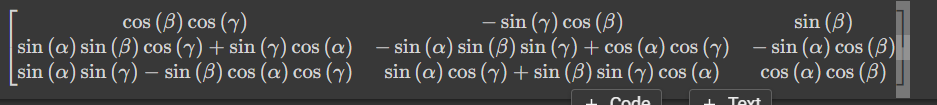

NameError: ignored

**42)** \\
\begin{align}
\dot{R}= R\Omega &\ &\ R(0)= I_{3\times 3} \\
\\
R(t) = exp(t\widehat{\Omega}) \\
\\
Trace(R_{(t2)})
\end{align}